# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [2]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
    return model

In [7]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.9


In [14]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='adam')

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==========

Epoch 45/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.7032 - accuracy: 0.7502 - val_loss: 1.7451 - val_accuracy: 0.5047
Epoch 46/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.6922 - accuracy: 0.7516 - val_loss: 1.6791 - val_accuracy: 0.5222
Epoch 47/50
50000/50000 [==============================] - 7s 144us/step - loss: 0.6834 - accuracy: 0.7569 - val_loss: 1.6777 - val_accuracy: 0.5204
Epoch 48/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.6724 - accuracy: 0.7589 - val_loss: 1.7492 - val_accuracy: 0.5066
Epoch 49/50
50000/50000 [==============================] - 7s 144us/step - loss: 0.6517 - accuracy: 0.7656 - val_loss: 1.7696 - val_accuracy: 0.5077
Epoch 50/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.6227 - accuracy: 0.7770 - val_loss: 1.7855 - val_accuracy: 0.5151
Experiment with LR = 0.001000
Model: "model_1"
___________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.7456 - accuracy: 0.7335 - val_loss: 1.5937 - val_accuracy: 0.5292
Epoch 44/50
50000/50000 [==============================] - 7s 148us/step - loss: 0.7299 - accuracy: 0.7398 - val_loss: 1.6179 - val_accuracy: 0.5255
Epoch 45/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.7284 - accuracy: 0.7413 - val_loss: 1.6678 - val_accuracy: 0.5127
Epoch 46/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.7039 - accuracy: 0.7485 - val_loss: 1.6903 - val_accuracy: 0.5166
Epoch 47/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.7120 - accuracy: 0.7444 - val_loss: 1.6915 - val_accuracy: 0.5148
Epoch 48/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.6856 - accuracy: 0.7555 - val_loss: 1.7394 - val_accuracy: 0.5152
Epoch 49/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.6701 - accuracy: 0.7622

Epoch 38/50
50000/50000 [==============================] - 9s 175us/step - loss: 0.8216 - accuracy: 0.7051 - val_loss: 1.5367 - val_accuracy: 0.5352
Epoch 39/50
50000/50000 [==============================] - 9s 174us/step - loss: 0.8052 - accuracy: 0.7131 - val_loss: 1.5244 - val_accuracy: 0.5283
Epoch 40/50
50000/50000 [==============================] - 9s 171us/step - loss: 0.7853 - accuracy: 0.7196 - val_loss: 1.5610 - val_accuracy: 0.5298
Epoch 41/50
50000/50000 [==============================] - 9s 170us/step - loss: 0.7629 - accuracy: 0.7277 - val_loss: 1.6143 - val_accuracy: 0.5230
Epoch 42/50
50000/50000 [==============================] - 9s 171us/step - loss: 0.7520 - accuracy: 0.7301 - val_loss: 1.5640 - val_accuracy: 0.5322
Epoch 43/50
50000/50000 [==============================] - 9s 172us/step - loss: 0.7358 - accuracy: 0.7377 - val_loss: 1.6207 - val_accuracy: 0.5273
Epoch 44/50
50000/50000 [==============================] - 9s 172us/step - loss: 0.7241 - accuracy: 0.7414

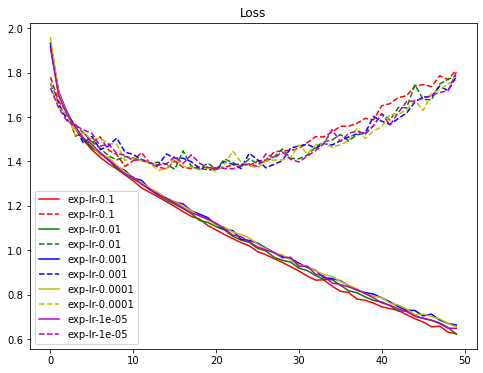

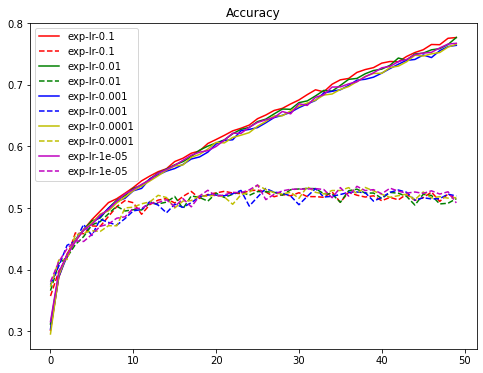

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [16]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='RMSprop')

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 46/50
50000/50000 [==============================] - 9s 171us/step - loss: 0.8066 - accuracy: 0.7102 - val_loss: 2.0657 - val_accuracy: 0.4664
Epoch 47/50
50000/50000 [==============================] - 8s 162us/step - loss: 0.7953 - accuracy: 0.7133 - val_loss: 2.0830 - val_accuracy: 0.4750
Epoch 48/50
50000/50000 [==============================] - 8s 161us/step - loss: 0.7864 - accuracy: 0.7159 - val_loss: 1.8572 - val_accuracy: 0.4886
Epoch 49/50
50000/50000 [==============================] - 8s 161us/step - loss: 0.7716 - accuracy: 0.7225 - val_loss: 1.9467 - val_accuracy: 0.4775
Epoch 50/50
50000/50000 [==============================] - 8s 162us/step - loss: 0.7596 - accuracy: 0.7257 - val_loss: 2.2864 - val_accuracy: 0.4483
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
__________

Epoch 44/50
50000/50000 [==============================] - 8s 162us/step - loss: 0.8554 - accuracy: 0.6904 - val_loss: 1.8828 - val_accuracy: 0.4814
Epoch 45/50
50000/50000 [==============================] - 8s 163us/step - loss: 0.8353 - accuracy: 0.7020 - val_loss: 1.8703 - val_accuracy: 0.4965
Epoch 46/50
50000/50000 [==============================] - 8s 162us/step - loss: 0.8276 - accuracy: 0.7002 - val_loss: 1.9528 - val_accuracy: 0.4798
Epoch 47/50
50000/50000 [==============================] - 8s 161us/step - loss: 0.8168 - accuracy: 0.7072 - val_loss: 2.0136 - val_accuracy: 0.4662
Epoch 48/50
50000/50000 [==============================] - 8s 161us/step - loss: 0.8055 - accuracy: 0.7108 - val_loss: 1.9892 - val_accuracy: 0.4754
Epoch 49/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.7935 - accuracy: 0.7159 - val_loss: 1.9833 - val_accuracy: 0.4782
Epoch 50/50
50000/50000 [==============================] - 8s 162us/step - loss: 0.7816 - accuracy: 0.7188

Epoch 42/50
50000/50000 [==============================] - 8s 161us/step - loss: 0.8878 - accuracy: 0.6847 - val_loss: 1.7219 - val_accuracy: 0.4969
Epoch 43/50
50000/50000 [==============================] - 8s 161us/step - loss: 0.8722 - accuracy: 0.6882 - val_loss: 1.7677 - val_accuracy: 0.4856
Epoch 44/50
50000/50000 [==============================] - 8s 159us/step - loss: 0.8635 - accuracy: 0.6897 - val_loss: 1.8016 - val_accuracy: 0.4982
Epoch 45/50
50000/50000 [==============================] - 8s 162us/step - loss: 0.8435 - accuracy: 0.6986 - val_loss: 1.7132 - val_accuracy: 0.4971
Epoch 46/50
50000/50000 [==============================] - 8s 162us/step - loss: 0.8346 - accuracy: 0.6986 - val_loss: 1.8842 - val_accuracy: 0.4827
Epoch 47/50
50000/50000 [==============================] - 8s 162us/step - loss: 0.8246 - accuracy: 0.7038 - val_loss: 1.8811 - val_accuracy: 0.4885
Epoch 48/50
50000/50000 [==============================] - 8s 160us/step - loss: 0.8121 - accuracy: 0.7102

Epoch 40/50
50000/50000 [==============================] - 8s 162us/step - loss: 0.8891 - accuracy: 0.6797 - val_loss: 1.8599 - val_accuracy: 0.4786
Epoch 41/50
50000/50000 [==============================] - 8s 163us/step - loss: 0.8779 - accuracy: 0.6845 - val_loss: 1.7998 - val_accuracy: 0.4866
Epoch 42/50
50000/50000 [==============================] - 8s 168us/step - loss: 0.8696 - accuracy: 0.6867 - val_loss: 1.8100 - val_accuracy: 0.4905
Epoch 43/50
50000/50000 [==============================] - 8s 163us/step - loss: 0.8500 - accuracy: 0.6953 - val_loss: 1.9973 - val_accuracy: 0.4530
Epoch 44/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.8370 - accuracy: 0.6988 - val_loss: 1.8252 - val_accuracy: 0.4927
Epoch 45/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.8265 - accuracy: 0.7011 - val_loss: 1.9257 - val_accuracy: 0.4749
Epoch 46/50
50000/50000 [==============================] - 8s 163us/step - loss: 0.8155 - accuracy: 0.7058

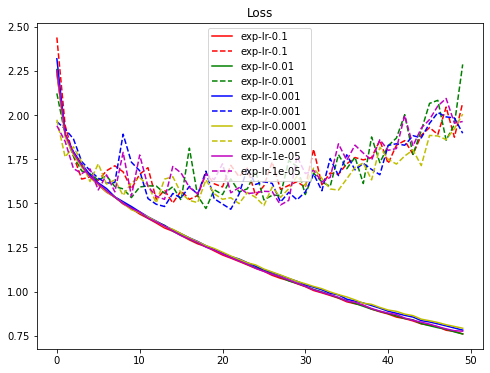

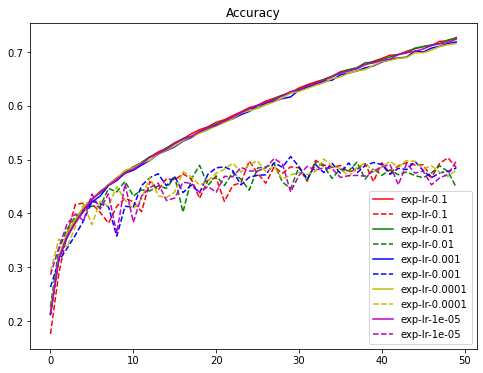

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [8]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='AdaGrad')

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==========

50000/50000 [==============================] - 9s 171us/step - loss: 1.0376 - accuracy: 0.6391 - val_loss: 1.3999 - val_accuracy: 0.5217
Epoch 48/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.0307 - accuracy: 0.6390 - val_loss: 1.4199 - val_accuracy: 0.5083
Epoch 49/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.0268 - accuracy: 0.6415 - val_loss: 1.3771 - val_accuracy: 0.5177
Epoch 50/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.0182 - accuracy: 0.6455 - val_loss: 1.4143 - val_accuracy: 0.5133
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_______________________________________

50000/50000 [==============================] - 10s 199us/step - loss: 1.1146 - accuracy: 0.6066 - val_loss: 1.4406 - val_accuracy: 0.4943
Epoch 45/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.1086 - accuracy: 0.6100 - val_loss: 1.4307 - val_accuracy: 0.4928
Epoch 46/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.0987 - accuracy: 0.6145 - val_loss: 1.3943 - val_accuracy: 0.5148
Epoch 47/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.0940 - accuracy: 0.6171 - val_loss: 1.4119 - val_accuracy: 0.5038
Epoch 48/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.0858 - accuracy: 0.6190 - val_loss: 1.3664 - val_accuracy: 0.5220
Epoch 49/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.0805 - accuracy: 0.6215 - val_loss: 1.4038 - val_accuracy: 0.5057
Epoch 50/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.0686 - accuracy: 0.6269 - va

50000/50000 [==============================] - 10s 194us/step - loss: 1.1462 - accuracy: 0.5971 - val_loss: 1.3486 - val_accuracy: 0.5227
Epoch 42/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.1351 - accuracy: 0.6023 - val_loss: 1.3995 - val_accuracy: 0.5102
Epoch 43/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.1285 - accuracy: 0.6026 - val_loss: 1.3570 - val_accuracy: 0.5262
Epoch 44/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.1186 - accuracy: 0.6076 - val_loss: 1.4365 - val_accuracy: 0.5031
Epoch 45/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.1123 - accuracy: 0.6085 - val_loss: 1.3975 - val_accuracy: 0.5082
Epoch 46/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.1048 - accuracy: 0.6116 - val_loss: 1.4239 - val_accuracy: 0.5069
Epoch 47/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.0983 - accuracy: 0.6126 - va

Epoch 39/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.1619 - accuracy: 0.5922 - val_loss: 1.4214 - val_accuracy: 0.5064
Epoch 40/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.1561 - accuracy: 0.5930 - val_loss: 1.3903 - val_accuracy: 0.5123
Epoch 41/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.1492 - accuracy: 0.5970 - val_loss: 1.3510 - val_accuracy: 0.5223
Epoch 42/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.1401 - accuracy: 0.5995 - val_loss: 1.4093 - val_accuracy: 0.5088
Epoch 43/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.1339 - accuracy: 0.6027 - val_loss: 1.4123 - val_accuracy: 0.5089
Epoch 44/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.1282 - accuracy: 0.6061 - val_loss: 1.4131 - val_accuracy: 0.5068
Epoch 45/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.1236 - accuracy: 0.6063

50000/50000 [==============================] - 9s 177us/step - loss: 1.1561 - accuracy: 0.5942 - val_loss: 1.4107 - val_accuracy: 0.4931
Epoch 37/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.1512 - accuracy: 0.5943 - val_loss: 1.3772 - val_accuracy: 0.5137
Epoch 38/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.1466 - accuracy: 0.5973 - val_loss: 1.3727 - val_accuracy: 0.5184
Epoch 39/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.1323 - accuracy: 0.6023 - val_loss: 1.4519 - val_accuracy: 0.4891
Epoch 40/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.1259 - accuracy: 0.6058 - val_loss: 1.4144 - val_accuracy: 0.5007
Epoch 41/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.1201 - accuracy: 0.6058 - val_loss: 1.3699 - val_accuracy: 0.5205
Epoch 42/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.1127 - accuracy: 0.6106 - val_

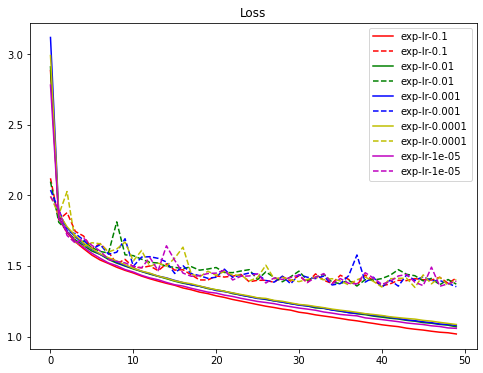

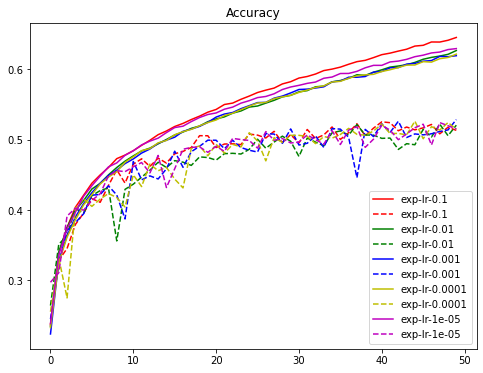

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()